In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

table = pd.DataFrame({'id':[1,2,3,4,5,6,7,8,9,10],'class':[0,0,1,1,1,0,1,0,1,0],'p1':[0.35,0.05,0.70,0.45,0.40,0.30,0.80,0.15,0.65,0.60],'p2':[0.8,0.40,0.10,0.25,0.05,0.15,0.60,0.20,0.45,0.30]},columns=['id','class','p1','p2'])
table 





Process SpawnPoolWorker-1:
Process SpawnPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
  File "/Users/seunfuta/op

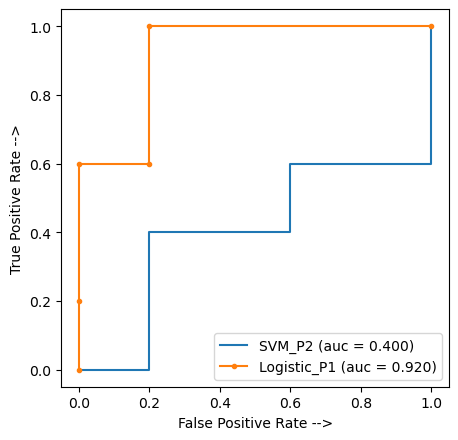

In [12]:
from sklearn.metrics import roc_curve, auc
y_test = table.loc[:,'class']
y_pred_logistic = table.loc[:,'p1']
y_pred_svm = table.loc[:,'p2']
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM_P2 (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic_P1 (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [13]:
threshold

array([1.8 , 0.8 , 0.45, 0.3 , 0.25, 0.15, 0.05])

In [ ]:
X = table.iloc[:,1].values
y = table.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [9]:
X_train

array([1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [ ]:
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)



In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)



In [ ]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)



In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()